In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *

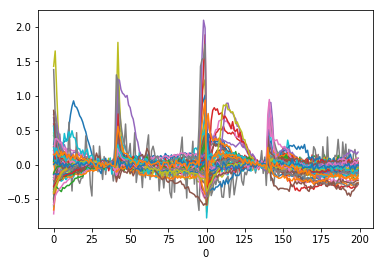

In [8]:
initial = pd.read_csv(r"data\\190819_file24_concat.csv", index_col=0, header=None).T
initial.T.plot(legend=False)

In [9]:
initial

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1,0.296508,0.431993,0.329875,0.329262,0.313243,0.300434,0.310191,0.334434,0.358874,0.377755,...,-0.132274,-0.126352,-0.164520,-0.144568,-0.160394,-0.158001,-0.137934,-0.151954,-0.106800,-0.113254
2,-0.491238,-0.303480,-0.237546,-0.182344,-0.115005,-0.043841,0.012246,0.008646,0.055190,0.029882,...,-0.272702,-0.271406,-0.301274,-0.305918,-0.284776,-0.302474,-0.280474,-0.305179,-0.272161,-0.261600
3,-0.356916,-0.210573,-0.189948,-0.146712,-0.132396,-0.137262,-0.124111,-0.141096,-0.128547,-0.142951,...,-0.158225,-0.163993,-0.174008,-0.149095,-0.172899,-0.153569,-0.180166,-0.217366,-0.196468,-0.162200
4,-0.581451,-0.325331,-0.263738,-0.192541,-0.152212,-0.110454,-0.095994,-0.048779,-0.029438,-0.031285,...,-0.318650,-0.306391,-0.321976,-0.310384,-0.335079,-0.342648,-0.322169,-0.331147,-0.318088,-0.287726
5,-0.406185,0.049042,0.223303,0.310755,0.273653,0.322463,0.270237,0.289675,0.217254,0.223146,...,-0.087267,-0.102270,-0.088442,-0.120767,-0.097628,-0.099681,-0.109340,-0.100381,-0.112223,-0.146520
6,-0.491532,-0.242878,-0.172337,-0.046181,-0.022043,0.008252,-0.002097,0.047246,0.073609,0.025948,...,-0.147970,-0.121380,-0.139929,-0.118718,-0.153542,-0.143904,-0.091643,-0.125647,-0.102496,-0.104305
7,-0.712955,-0.395644,-0.257366,-0.176899,-0.058378,0.029430,0.097120,0.162038,0.212004,0.181956,...,-0.163295,-0.204561,-0.243606,-0.232796,-0.233837,-0.235268,-0.229560,-0.227804,-0.208095,-0.210606
8,-0.508001,-0.175635,-0.104859,-0.063473,-0.038040,-0.038478,-0.044894,-0.021612,-0.026005,-0.034017,...,-0.087562,-0.110684,-0.132727,-0.093640,-0.131504,-0.135890,-0.120205,-0.144377,-0.095987,-0.111213
9,-0.474422,-0.267464,-0.289981,-0.203153,-0.206636,-0.184895,-0.130857,-0.138437,-0.116137,-0.172102,...,-0.144269,-0.138267,-0.115335,-0.095760,-0.114834,-0.185995,-0.147181,-0.152166,-0.139313,-0.146945
10,-0.405779,-0.097706,-0.076881,-0.084713,-0.039811,-0.079621,-0.112943,-0.095134,-0.036978,-0.098834,...,-0.069992,-0.083283,-0.143760,-0.118643,-0.134014,-0.098957,-0.115319,-0.125815,-0.138462,-0.127641


In [10]:
initial.drop(range(86, 135), axis=1, inplace=True)

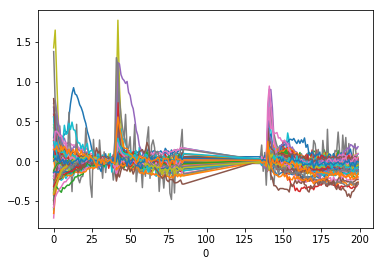

In [11]:
initial.T.plot(legend=False)

In [15]:
renamed = {a : b for a, b in zip(list(initial.columns), range(len(list(initial.columns))))}

In [18]:
initial.rename(columns=renamed, inplace=True)

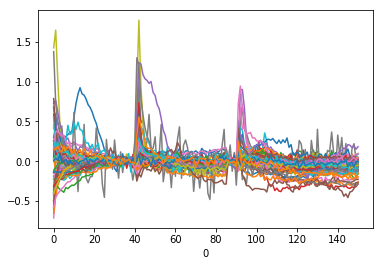

In [19]:
initial.T.plot(legend=False)

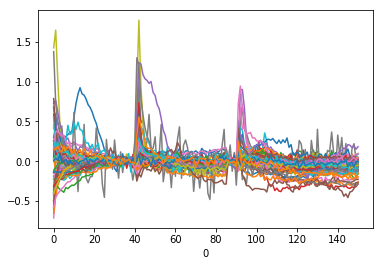

In [20]:
initial.T.plot(legend=False)

## Dropper fn

In [25]:
def frameRemoval(df, start, end):
    '''Removes the frames between start and end (incl excl) and returns a new df'''
    assert (start >= 0) and (start < end) and (end <= len(df.columns))
    df = df.drop(range(start, end), axis=1)
    renamed = {a : b for a, b in zip(list(df.columns), range(len(list(df.columns))))}
    df.rename(columns=renamed, inplace=True)
    return df

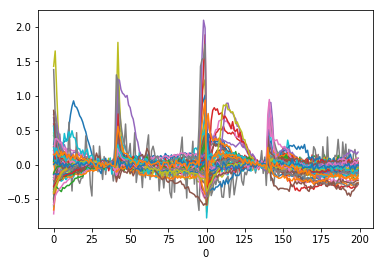

In [22]:
initial = pd.read_csv(r"data\\190819_file24_concat.csv", index_col=0, header=None).T
initial.T.plot(legend=False)

In [23]:
dropped = frameRemoval(initial, 86, 134)

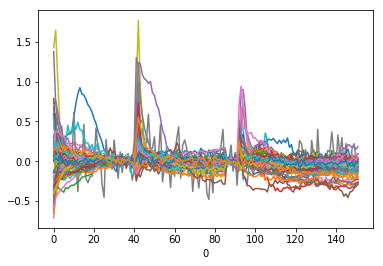

In [24]:
dropped.T.plot(legend=False)

# PCA

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [30]:
df = removeLowSTD(initial, 3)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)

In [31]:
p = list(pca.inverse_transform(principalComponents)[0])
b = list(df.iloc[0])

<IPython.core.display.Javascript object>


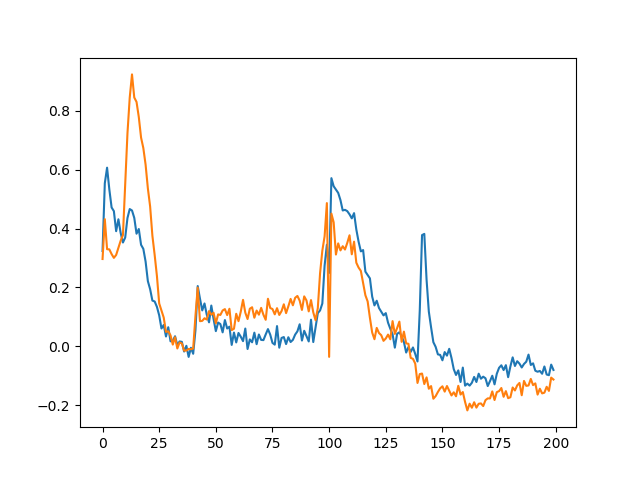

In [32]:
%matplotlib notebook
plt2 = plt.figure()
plt.plot(p)
plt.plot(b)
plt.show()

In [33]:
principalComponents

array([[ 1.19029871, -1.43282665,  1.95384968],
       [-1.10023537, -0.044419  , -0.4423415 ],
       [-1.02565204, -0.13859968,  1.44435139],
       [-0.89843987, -0.92621895,  0.04459803],
       [-0.83047135, -1.0739006 ,  0.54040721],
       [-1.35161363,  0.1245003 , -0.72607259],
       [-0.62696988, -0.22740349, -0.29678704],
       [ 0.9466025 , -0.79431461,  0.71902178],
       [-0.65848074,  0.23640335,  0.26979863],
       [-0.55390477,  0.42389856,  0.56471424],
       [-0.28743036,  0.41191066,  0.30529067],
       [ 1.21997181, -1.21970957, -0.67610422],
       [-1.19698507, -0.66320969, -0.49890027],
       [-1.02953323, -0.38215769, -0.07428066],
       [ 0.33762743,  2.27800951, -0.00753069],
       [ 2.68683312,  2.02466807,  0.40678134],
       [ 0.30750212,  0.48644699,  0.69072054],
       [ 1.09948791,  2.00590416, -0.21967131],
       [-1.22941653, -0.29247043, -0.44811864],
       [-0.61024341,  0.12658394, -1.20450707],
       [ 2.89700492, -1.83995141, -0.497

<IPython.core.display.Javascript object>


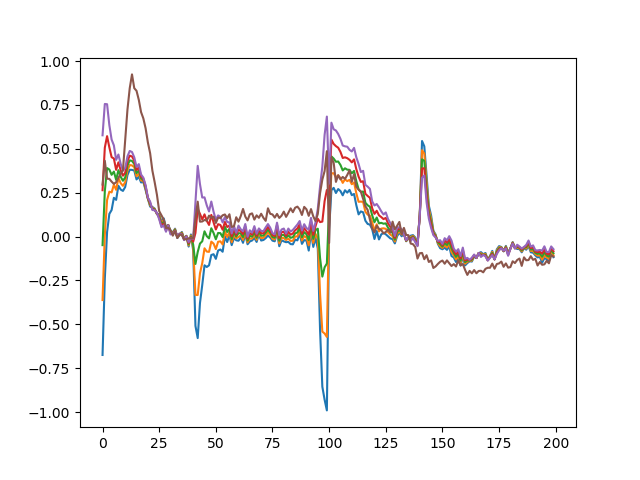

In [35]:
trialPCAB = np.array([[x, -1.43282665,  1.95384968] for x in range(-2, 3)])
trialBackB = pca.inverse_transform(trialPCAB)
%matplotlib notebook
plt4 = plt.figure()
plt.plot(trialBackB[0])
plt.plot(trialBackB[1])
plt.plot(trialBackB[2])
plt.plot(trialBackB[3])
plt.plot(trialBackB[4])
plt.plot(list(df.iloc[0]))
plt.show()

<IPython.core.display.Javascript object>


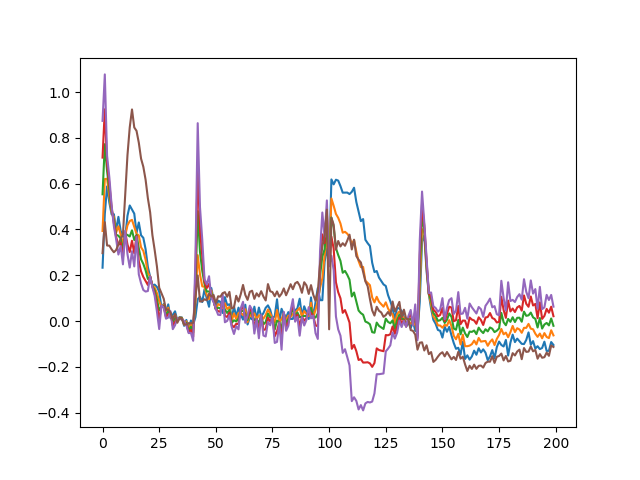

In [36]:
trialPCAB = np.array([[1.19029871, x,  1.95384968] for x in range(-2, 3)])
trialBackB = pca.inverse_transform(trialPCAB)
%matplotlib notebook
plt4 = plt.figure()
plt.plot(trialBackB[0])
plt.plot(trialBackB[1])
plt.plot(trialBackB[2])
plt.plot(trialBackB[3])
plt.plot(trialBackB[4])
plt.plot(list(df.iloc[0]))
plt.show()

<IPython.core.display.Javascript object>


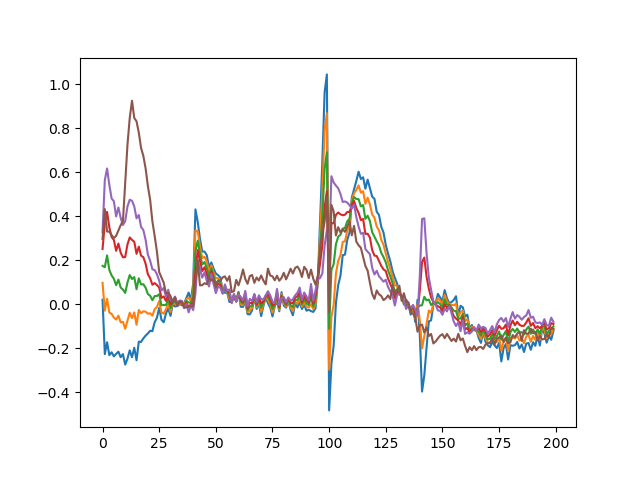

In [37]:
trialPCAB = np.array([[1.19029871, -1.43282665,  x] for x in range(-2, 3)])
trialBackB = pca.inverse_transform(trialPCAB)
%matplotlib notebook
plt4 = plt.figure()
plt.plot(trialBackB[0])
plt.plot(trialBackB[1])
plt.plot(trialBackB[2])
plt.plot(trialBackB[3])
plt.plot(trialBackB[4])
plt.plot(list(df.iloc[0]))
plt.show()